In [ ]:
import sys
import os
sys.path.append('..')


import torch

from manga_ocr.utils import get_path_project_dir
from manga_ocr.utils.ploting import plot_losses, show_images
from manga_ocr.utils.pytorch_model import get_total_parameters_count

# Load/Prepare model

In [2]:
from manga_ocr.models.recognition.crnn.crnn import CRNN

path_output_model = get_path_project_dir('data/output/models/recognition.bin')
print('path_output_model', os.path.abspath(path_output_model))

if os.path.exists(path_output_model):
    print('Loading an existing model...')
    model = torch.load(path_output_model)
else:
    print('Creating a new model...')
    model = CRNN()
    
print(model)
print(model.input_height)

path_output_model /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/output/models/recognition.bin
Creating a new model...
CRNN(
  (prediction): Linear(in_features=128, out_features=81, bias=True)
  (feature_extraction_model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (sequential_model): Sequential(
    (0): Linear(in_features=3072, out_features=64, bias=True)
    (1): BidirectionalRNNBlock(
      (rnn): LSTM(64, 64, num_layers=3, batch_first=True, bidirectional=True)
      (linear): Linear(in_features=128, out_features=128, bias=True)
    )
  )
)
24


In [3]:
get_total_parameters_count(model)

492689

## Load/Prepare Dataset

In [4]:
from manga_ocr.models.recognition.recognition_dataset import RecognitionDataset

path_generated_dataset /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/output/generate_manga_dataset
generated_dataset 3178


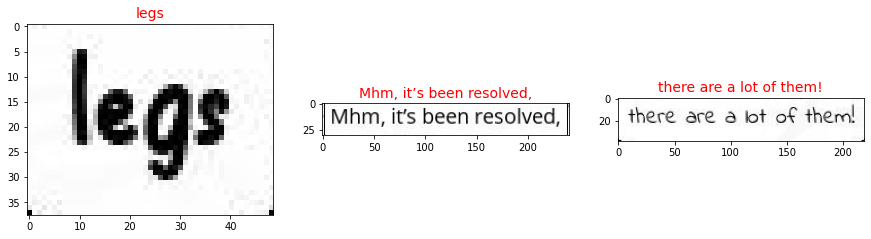

In [5]:
# Load generated dataset
path_generated_dataset = get_path_project_dir('data/output/generate_manga_dataset')
print('path_generated_dataset', os.path.abspath(path_generated_dataset))

generated_dataset = RecognitionDataset.load_generated_dataset(path_generated_dataset, input_height=model.input_height)
print('generated_dataset', len(generated_dataset))


show_images(
    [generated_dataset.get_line_image(0), generated_dataset.get_line_image(1), generated_dataset.get_line_image(-1)],
    [generated_dataset.get_line_text(0), generated_dataset.get_line_text(1), generated_dataset.get_line_text(-1)],
) 

path_annotated_dataset /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated
annotated_dataset 470


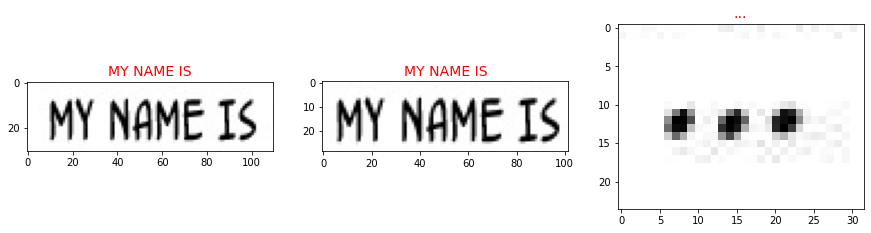

In [6]:
# Load annotated dataset
path_annotated_dataset = get_path_project_dir('data/manga_line_annotated')
print('path_annotated_dataset', os.path.abspath(path_annotated_dataset))


annotated_dataset = RecognitionDataset.load_annotated_dataset(
    path_annotated_dataset, input_height=model.input_height, random_padding_copy_count=2)
print('annotated_dataset', len(annotated_dataset))

show_images(
    [annotated_dataset.get_line_image(0), annotated_dataset.get_line_image(1), annotated_dataset.get_line_image(-1)],
    [annotated_dataset.get_line_text(0), annotated_dataset.get_line_text(1), annotated_dataset.get_line_text(-1)],
) 

In [7]:
validation_dataset = RecognitionDataset.merge(
    annotated_dataset.subset(to_idx=60), 
    generated_dataset.subset(to_idx=40)
).shuffle()

training_dataset = RecognitionDataset.merge(
    annotated_dataset.subset(from_idx=60), 
    generated_dataset.subset(from_idx=40)
).shuffle()


print('validation_dataset', len(validation_dataset))
print('training_dataset', len(training_dataset))

validation_dataset 100
training_dataset 3548


# Training

In [9]:
from manga_ocr.models.recognition.train import train
from IPython.display import clear_output

def show_example(model, images):
    outputs = [model.recognize(img) for img in images]
    show_images(images, outputs)


def save_and_report(i_epoch, train_losses, val_losses):
    clear_output()
    plot_losses(train_losses, val_losses)
    show_example(model, [
        validation_dataset.get_line_image(0), 
        validation_dataset.get_line_image(1), 
        validation_dataset.get_line_image(2),
        training_dataset.get_line_image(0), 
        training_dataset.get_line_image(1), 
        training_dataset.get_line_image(-1)
    ])
    
    torch.save(model, path_output_model)

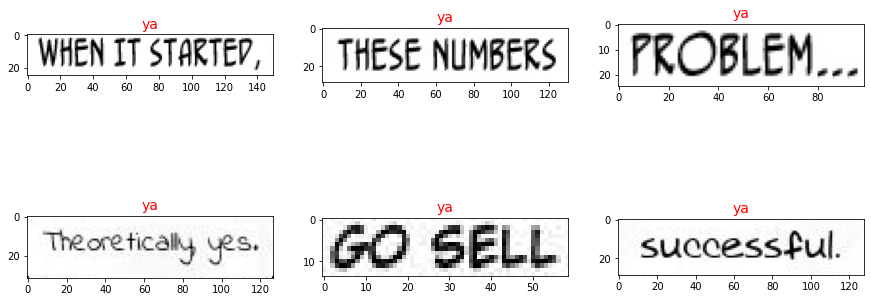

In [10]:
show_example(model, [
    validation_dataset.get_line_image(0), 
    validation_dataset.get_line_image(1), 
    validation_dataset.get_line_image(-1),
    training_dataset.get_line_image(0), 
    training_dataset.get_line_image(1), 
    training_dataset.get_line_image(-1)
])

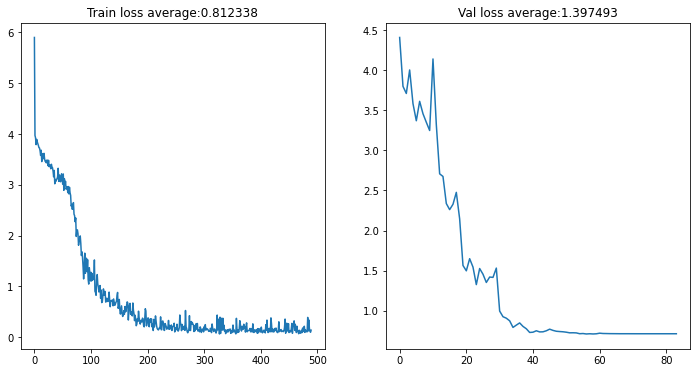

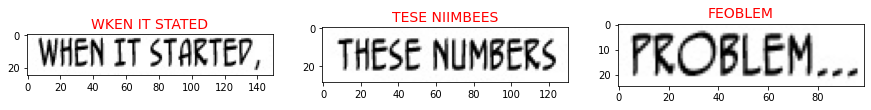

Epoch 6: 100%|███| 3548/3548 [07:38<00:00,  7.75it/s, training_batch_loss=0.138]


([5.899416246414185,
  3.9718873119354248,
  3.9246072006225585,
  3.78978946685791,
  3.894819121360779,
  3.8463685274124146,
  3.810850114822388,
  3.774456400871277,
  3.7323274660110473,
  3.724643235206604,
  3.670775308609009,
  3.577451686859131,
  3.6804378175735475,
  3.456102237701416,
  3.6113438272476195,
  3.506779146194458,
  3.601797785758972,
  3.6182498598098753,
  3.5105220174789427,
  3.4601783990859984,
  3.464117045402527,
  3.4315086650848388,
  3.485740747451782,
  3.483510570526123,
  3.3756117153167726,
  3.4817507600784303,
  3.357315239906311,
  3.393247575759888,
  3.367813172340393,
  3.314547047615051,
  3.403916244506836,
  3.351531162261963,
  3.3349641275405886,
  3.265965003967285,
  3.1568591594696045,
  3.282858409881592,
  3.0194039440155027,
  3.1057891130447386,
  3.0685748529434203,
  3.106225080490112,
  3.113501353263855,
  3.1602851057052614,
  3.3246130990982055,
  3.0660692644119263,
  3.1914248085021972,
  3.18235089302063,
  3.05931244373

In [11]:
#validation_dataset = validation_dataset.subset(to_idx=10)
#training_dataset = training_dataset.subset(to_idx=50)

_ = train(model,
      training_dataset=training_dataset,
      validation_dataset=validation_dataset,
      epoch_count=7,
      batch_size=50,
      epoch_callback=save_and_report,
      update_callback=save_and_report,
      update_every_n=300,
      validation_every_n=300
)